In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("system-overhead.csv")
df["duration"] = pd.to_timedelta(df["duration"])

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype          
---  ------    --------------  -----          
 0   scenario  15 non-null     int64          
 1   run       15 non-null     int64          
 2   duration  15 non-null     timedelta64[ns]
dtypes: int64(2), timedelta64[ns](1)
memory usage: 488.0 bytes


,scenario,run,duration
0,2,0,0 days 00:02:33.813835786
1,2,1,0 days 00:02:26.758180526
2,2,2,0 days 00:02:34.970583996
3,3,0,0 days 00:02:29.016033169
4,3,1,0 days 00:02:25.060515508


1 65.709688 2.644176
2 151.847533 4.445295
3 155.821738 15.341423
4 146.662752 8.166522
5 139.164663 4.286114


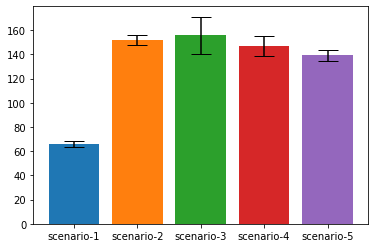

In [2]:
import matplotlib.pyplot as plt

scenarios = df["scenario"].sort_values().unique()

for scenario in scenarios:
    durations = df.loc[df.scenario == scenario].duration
    mean = durations.mean()
    std = durations.std()
    
    print(scenario, mean.total_seconds(), std.total_seconds())
    plt.bar(f"scenario-{scenario}", mean.total_seconds(), yerr=std.total_seconds(), capsize=10)